### How to analyze data from different formats, like text from social media:

In [1]:
#!pip install python-dotenv

In [2]:
from dotenv import load_dotenv
from os import getenv

In [3]:
#chek if works:
load_dotenv()

APP_NAME = getenv("APP_NAME")
print(APP_NAME)

aging_healthy_factors


In [4]:
import requests
import json
import pandas as pd

In [5]:
# Load from the .env
load_dotenv()

# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
REDDIT_USERNAME = getenv('REDDIT_USERNAME')
REDDIT_PASSWORD = getenv('REDDIT_PASSWORD')

In [6]:
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and REDDIT_USERNAME and REDDIT_PASSWORD:
    print("Success!!")
else:
    print("ERROR: Credentials not loaded!!")

Success!!


In [7]:
REDDIT_USERNAME

'gracie_m_ludwig'

In [8]:
# Sets up the authentication part of the request
auth = requests.auth.HTTPBasicAuth(f'{APP_ID}', f'{APP_SECRET}')

In [9]:
auth

In [10]:
# this requests header gives reddit a brief description of the app
# os:app_name:version (by /u/username)   (format used by reddit to request data)
headers = {'User-Agent': f'windows:{APP_NAME}:v1.0 (by /u/{APP_ID})'}
data = {'grant_type': 'client_credentials'}  # app id and secret

In [11]:
# Makes the request to the access_token api endpoint, and saves the response in res
res = requests.post('https://www.reddit.com/api/v1/access_token', auth=auth, headers=headers)

In [12]:
res   # 200 means is working

<Response [200]>

In [13]:
# Makes the request to the access_token api endpoint, and saves the response in res
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# Converts response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# Adds authorisation to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# While the token is valid (~2 hours) we can just add headers=headers to our requests to prove authentication
# Making a test request. <Response [200]> means that it was a success!
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [17]:
res = requests.get("https://oauth.reddit.com/r/health/hot", headers=headers)

print(res.json())

{'kind': 'Listing', 'data': {'after': 't3_1ff7cq7', 'dist': 25, 'modhash': '', 'geo_filter': None, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'Health', 'selftext': '', 'author_fullname': 't2_i4neeuka2', 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': 'Opinion | I’m a Doctor. The Conversations About IUD Insertions Are Long Overdue. (Gift Article)', 'link_flair_richtext': [{'a': ':snoo:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/3whaar0s9ezz_t5_3nqvj/snoo'}, {'e': 'text', 't': ' article'}], 'subreddit_name_prefixed': 'r/Health', 'hidden': False, 'pwls': 6, 'link_flair_css_class': None, 'downs': 0, 'thumbnail_height': 73, 'top_awarded_type': None, 'hide_score': False, 'name': 't3_1fhedij', 'quarantine': False, 'link_flair_text_color': None, 'upvote_ratio': 0.99, 'author_flair_background_color': '#ffffff', 'subreddit_type': 'public', 'ups': 369, 'total_awards_received': 0, 'media_embed': {}, 'thumbnail_width': 140, 

In [18]:
# Loop through all the results, printing the titles of each
for post in res.json()['data']['children']:
    print(post['data']['title'])

Opinion | I’m a Doctor. The Conversations About IUD Insertions Are Long Overdue. (Gift Article)
Pfizer says its experimental drug for deadly condition that causes appetite and weight loss in cancer patients shows positive trial results
After Shark Tank, Mark Cuban Just Wants to Break Shit—Especially the Prescription Drug Industry
How redefining ‘normal’ iron levels could help improve women’s health 
A Lyme vaccine is in late-stage trials. Could an anti-tick vaccine be next?
'Making peoples' lives hell': When he couldn't pay for cancer treatment, the hospital sued
Some people claim taping your mouth shut helps you sleep better—but what are the risks?
An ER Doctor’s Cure for America’s Gun Epidemic
OC sober living operator convicted in ‘body broker’ kickback scheme
Boar’s Head to close Virginia plant linked to deadly listeria outbreak
She Ate a Poppy Seed Salad Just Before Giving Birth. Then They Took Her Baby Away.
Opioid deaths now lowest in 3 years, but still worse than pre-pandemic
Ho

In [28]:
data.keys()

dict_keys(['grant_type'])

In [29]:
health_comments = [comment.body for comment in post.comments]
health_df = pd.DataFrame(health_comments, columns=['Comment Body'])   #transform it into a dataframe:

In [30]:
health_df.head()  

,Comment Body
0,Also you may want to get in contact with the f...
1,Make sure you go back to the consultant in SJU...
2,"I'm delighted you were diagnosed, (look after ..."
3,A friend of mine had an brain bleed and was sa...
4,"Had a similar story, but with viral meningitis..."


In [63]:
health_df.shape

(116, 1)

### sentimental Polarity analyze: 

In [21]:
import praw   # sentimental analyzes using praw

In [22]:
reddit = praw.Reddit(
    client_id=getenv("APP_ID"), 
    client_secret=getenv("APP_SECRET"), 
   user_agent=f"{getenv('APP_NAME')}u/{getenv('REDDIT_USERNAME')}", 
)

In [23]:
load_dotenv() 

True

#### Checking the sentiment polarity about a desired topic

In [24]:
url = "https://www.reddit.com/r/ireland/comments/1b9w5td/is_our_healthcare_system_really_this_bad/"

In [25]:
post = reddit.submission(url=url)    # to get the title of the comment
print(post.title)
print(post.selftext)

Is our healthcare system really this bad?
Woke up last Friday with vertigo, a banging headache, neck pain and nausea. So off to the GP I went who referred me to A&E because he suspected meningitis. Arrived at James's Hospital at 11am. In there for 12 hours before they decided to admit me and do a lumbar puncture. Lumbar puncture didn't show any thing. Woke up on Saturday and they said they need to keep me to do an MRI. 

Symptoms continue to get serverly worse from here. At this point I am not eating at all as well. Something I didn't know about hospitals is there's barely if any consultants or staff working over the weekend. This means I needed to wait until Sunday afternoon to do the MRI. MRI showed nothing too. However, my symptoms are worsening. 9.5/10 painful headaches, puking bile, can barely move my neck. 

Woke up Monday and the consultant said I just have migraines and I am being discharged with some paracetamol. This is despite no history of migraines previously and being in 

In [26]:
for comment in post.comments:    # only top level comment, not nested
    print(comment.body)

Also you may want to get in contact with the flight company to let them know. You had meningitis on a full plane of people. You could have passed it on.
Make sure you go back to the consultant in SJUH with the results from Germany and let them know what happened.

Edit to add: I’m not saying as a complaint but as a general follow up and for all health professionals learning.
I'm delighted you were diagnosed, (look after yourself now ! , I hope it all works out 


but please send your results from Germany back to the hospital/doctor 

You should show them this
A friend of mine had an brain bleed and was saved by emegency surgery in CUH, all happened including ambulance ride in under and hour... 100% saved his life, so pretty amazing. However recovery was a disaster, he ended up getting a bacterial infection (undiagnosed) on the plate they put in his skull that made hem terrible sick and in pain for 2 years. He was more or less fobbed off. Ended up requesting his records and sending them

In [31]:
health_system = [comment.body for comment in post.comments]
ie_health_system_comments_df = pd.DataFrame(health_system, columns=['Comment Body'])

In [32]:
ie_health_system_comments_df.head()

,Comment Body
0,Also you may want to get in contact with the f...
1,Make sure you go back to the consultant in SJU...
2,"I'm delighted you were diagnosed, (look after ..."
3,A friend of mine had an brain bleed and was sa...
4,"Had a similar story, but with viral meningitis..."


In [33]:
ie_health_system_comments_df.shape

(116, 1)

In [34]:
ie_health_system_comments_df.reset_index(inplace=True)
ie_health_system_comments_df.rename(columns={'index': 'Id'}, inplace=True)

In [35]:
import nltk      # import libraries to clean data 
from nltk.corpus import stopwords
nltk.download('stopwords')

C:\Users\graci\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\graci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [37]:
sia = SentimentIntensityAnalyzer()

In [38]:
sia.polarity_scores("Pretty much every one you'll speak to has a hse horror story.")

{'neg': 0.233, 'neu': 0.566, 'pos': 0.201, 'compound': -0.128}

In [40]:
# run in the entire dataset using a loop
res = {}
for i, row in tqdm(ie_health_system_comments_df.iterrows(), total=len(ie_health_system_comments_df)):
    text = row['Comment Body']
    id = row['Id']
    res[id] = sia.polarity_scores(text)
             

  0%|          | 0/116 [00:00<?, ?it/s]

In [41]:
res

{0: {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.0772},
 1: {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.2718},
 2: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.7463},
 3: {'neg': 0.133, 'neu': 0.756, 'pos': 0.111, 'compound': -0.5571},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.214, 'neu': 0.69, 'pos': 0.097, 'compound': -0.8176},
 6: {'neg': 0.257, 'neu': 0.726, 'pos': 0.017, 'compound': -0.9808},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.184, 'neu': 0.719, 'pos': 0.097, 'compound': -0.9719},
 9: {'neg': 0.073, 'neu': 0.827, 'pos': 0.1, 'compound': 0.1189},
 10: {'neg': 0.114, 'neu': 0.7, 'pos': 0.186, 'compound': 0.3597},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.9136},
 13: {'neg': 0.096, 'neu': 0.798, 'pos': 0.107, 'compound': 0.5449},
 14: {'neg': 0.017, 'neu': 0.932, 'pos': 0.051, 'compound': 0.5574},
 15: {'neg

In [42]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,0.957,0.043,0.0772
1,0.000,0.925,0.075,0.2718
2,0.000,0.786,0.214,0.7463
3,0.133,0.756,0.111,-0.5571
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
111,0.114,0.754,0.132,0.2944
112,0.000,0.332,0.668,0.9335
113,0.000,1.000,0.000,0.0000
114,0.371,0.629,0.000,-0.7574


In [43]:
# transform the res into a dataframe, t = transpose it, and use the reset index function , rename columns
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id', 'neg': 'negative', 'neu': 'neutral', 'pos': 'positive' })

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

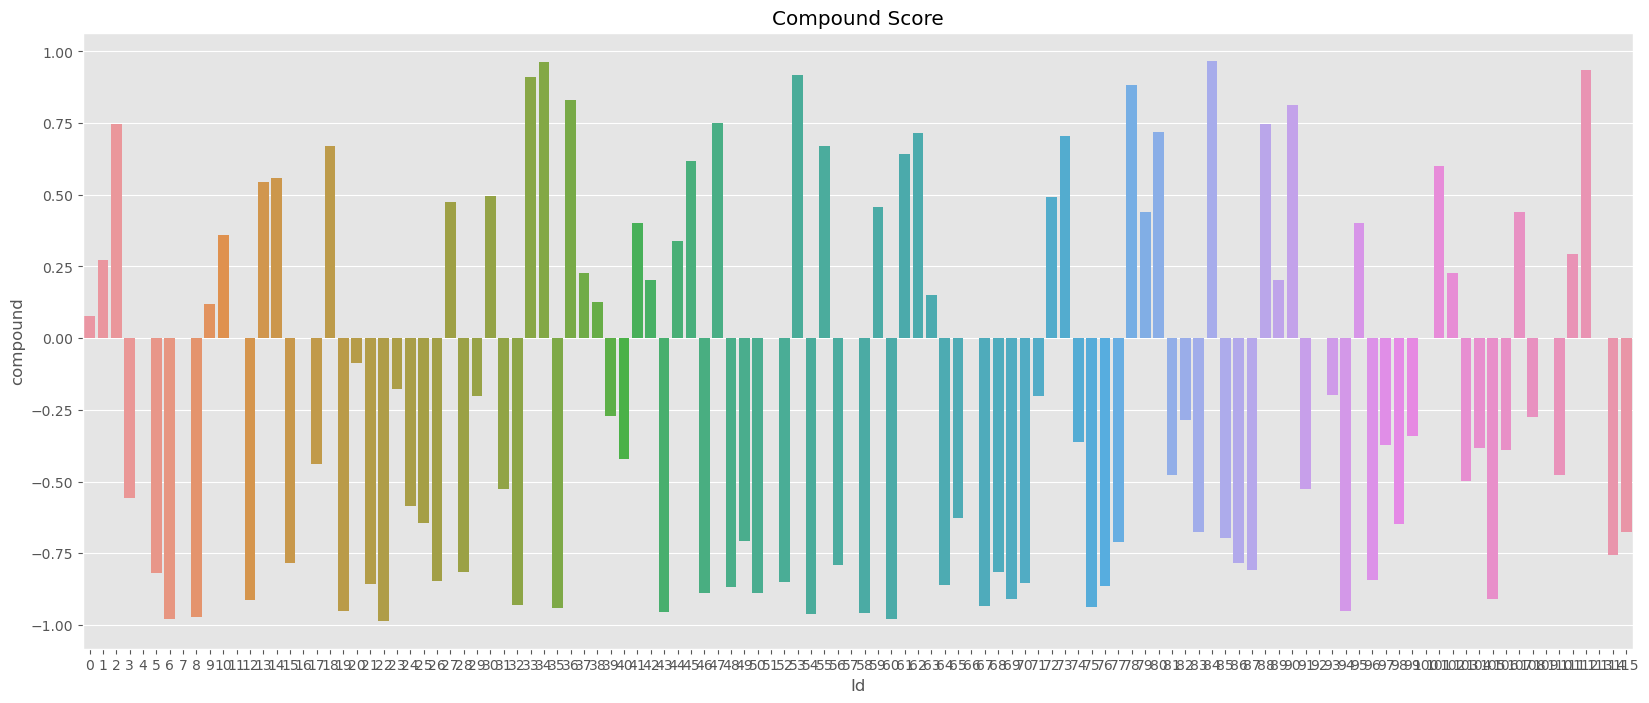

In [57]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=vaders.head(116), x='Id', y='compound')
ax.set_title('Compound Score')
plt.show()

#### looking at the figure above we can see that the reviews are more inclined to negative

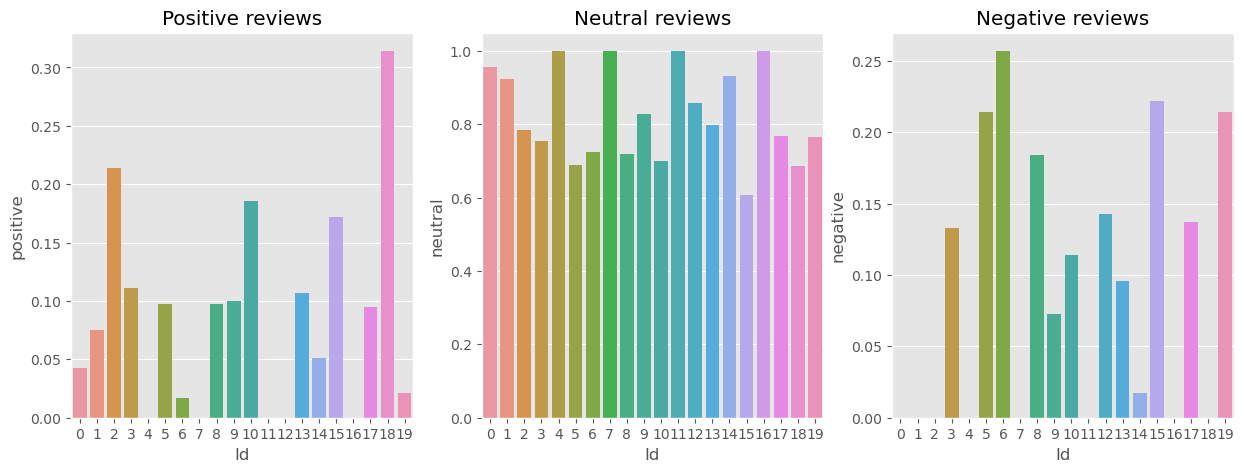

In [59]:
# you can also visualize them separatly
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders.head(20), x= 'Id', y='positive', ax=axs[0])
sns.barplot(data=vaders.head(20), x= 'Id', y='neutral', ax=axs[1])
sns.barplot(data=vaders.head(20), x= 'Id', y='negative', ax=axs[2])
axs[0].set_title('Positive reviews')
axs[1].set_title('Neutral reviews')
axs[2].set_title('Negative reviews')
plt.show()

#### 

#### A compound score is a single number that summarizes the overall sentiment of a piece of text. It comes from sentiment analysis tools: VADER (Valence Aware Dictionary and sEntiment Reasoner) 
The compound score ranges from numbers -1 to +1:

+1 means extremely positive sentiment.
-1 means extremely negative sentiment.
0 means neutral sentiment.

In [60]:
# Calculating the mean of positive, neutral, and negative reviews
mean_value = vaders[['positive', 'neutral', 'negative']].mean()

In [61]:
# Creating a new dataframe to store the values
mean_df = pd.DataFrame(mean_value, columns=['mean']).reset_index()
mean_df.columns = ['sentiment', 'mean']


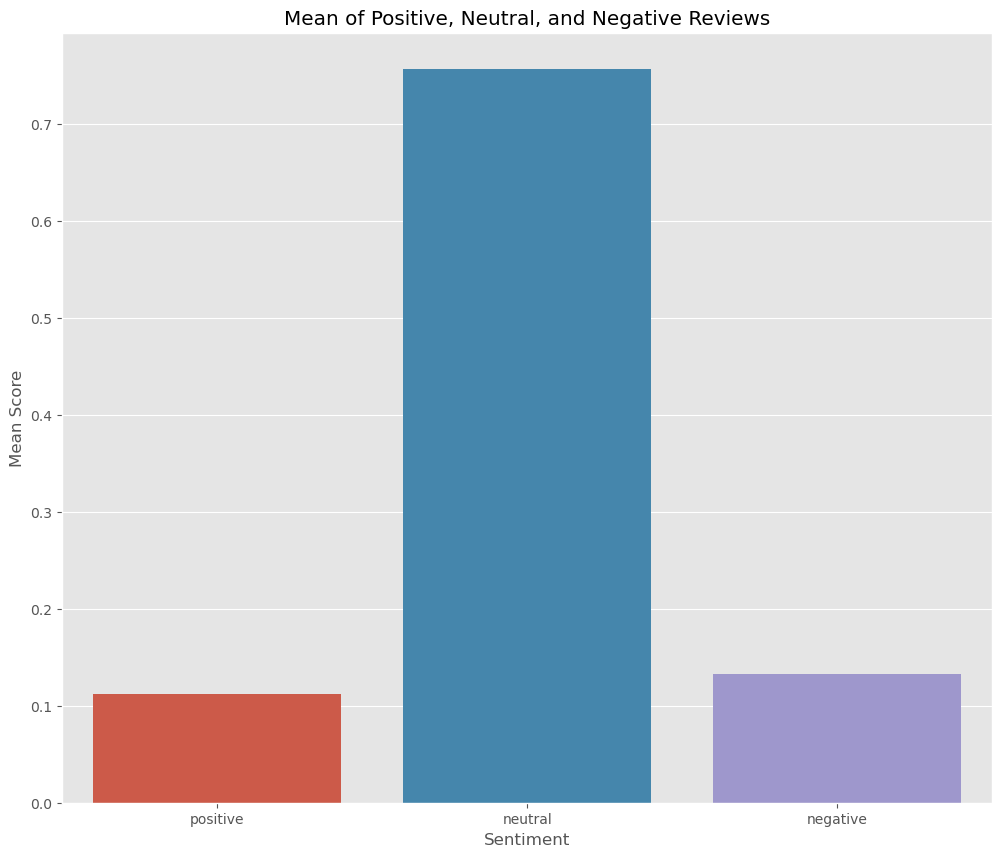

In [62]:
# Create a barplot showing the mean of positive, neutral, and negative reviews
plt.figure(figsize=(12, 10))
sns.barplot(data=mean_df, x='sentiment', y='mean')
plt.title('Mean of Positive, Neutral, and Negative Reviews')
plt.ylabel('Mean Score')
plt.xlabel('Sentiment')
plt.show()

#### it is possible to see that most of the reviews are more neutral then negative, this is due the fact that 
##### machines dont understand sarcasm , but nowadays there are already being build new libraries to help 
#### machines recognize things like irony or sarcasm by analysing the context